In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **1. Reading In and Understanding the Data**

**Here we get an understanding of the types of data we are dealing with alongside seeing which attributes contain the
most null values in our dataset. Seeing these null values early on help us begin to think about the feature egineering process
as we may wantt to fill these null values with the mean or median, or totally disregard the attribute entirely.**

In [2]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train = pd.read_csv('/kaggle/input/titanic/train.csv') #loading datasets

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()
#note that cabin has a large amount of null values - may not be useful
#embarked has two null values
#age has a couple null values - (may want to see if we should fill these with the mean if normally distributed)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **2. Visualising Data**

**In order to visualise the data the steps I am going to take are:**
*  Splitting Data into Numerical and Categorical Variables so I can quickly visualise each and get a quick understanding of them
* Take a look at the correlations of the data
* Creating more meaningful plots to understand what variables are going to be important to use in our model.

In [5]:
#split data into numerical and categorical for analysis
num = train[['Age','SibSp','Parch','Fare']]
cat = train[['Survived','Pclass','Sex']]
#num.head()

**Plotting distributions for numerical Data**

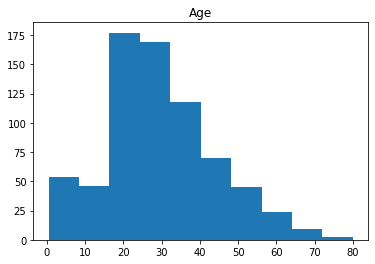

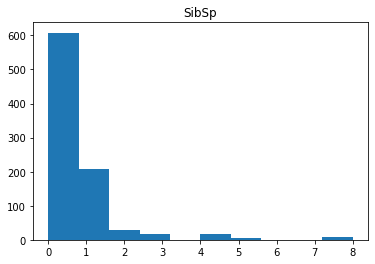

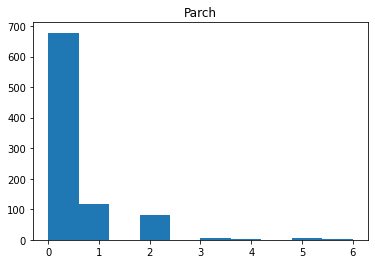

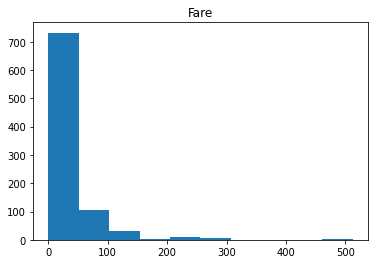

In [6]:
for i in num.columns:
    plt.hist(num[i])
    plt.title(i)
    plt.show()

#note that fare is very logarthmic

**Here we see that the fare variable is very logarithmically distributed - this may be important if we are using it in our model.**

**Plotting categorical values**

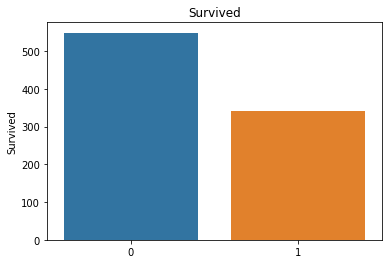

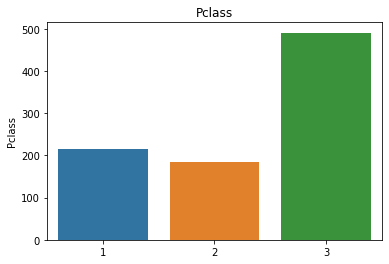

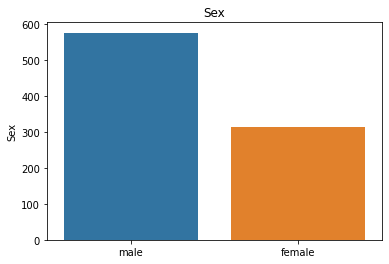

In [7]:
for i in cat.columns:
    sns.barplot(x=cat[i].value_counts().index,y=cat[i].value_counts()).set_title(i)
    plt.show()

**Now that we have a rough idea of the data, both numerical and categorical. Lets take a look at some correlations.**

<AxesSubplot:>

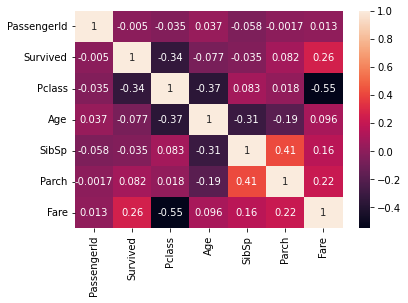

In [8]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

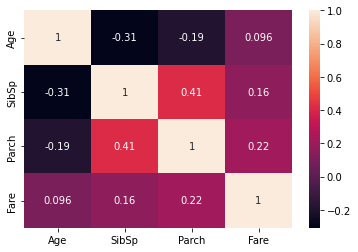

In [9]:
sns.heatmap(num.corr(),annot=True)

**Now lets look at some interesting graphs to see what attributes we should be using in our model.**

<AxesSubplot:xlabel='Age', ylabel='Count'>

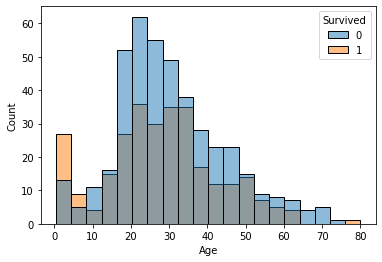

In [10]:
#Lets see what ages survived.
sns.histplot(data=train,x='Age',hue='Survived')

* We can see clearly that age has an impact on your suvival rate.


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

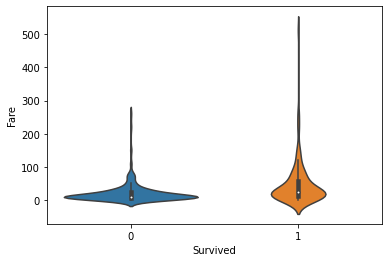

In [11]:
#sns.histplot(data=train,x='Fare',hue='Survived')
sns.violinplot(x="Survived", y="Fare", data=train)

* We can see that the majority of people wh didnt survive are those who didn't pay a high fare, we also see that purchasing a higher fare will increase your chances of survival.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

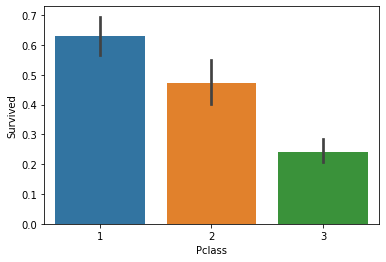

In [12]:
sns.barplot(data=train,x='Pclass',y='Survived')

* Over 60% of people in first clkass survived - whereas around only a quarter of third class survived.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

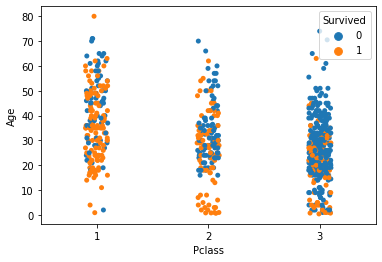

In [13]:
#looking at Class and Age
#sns.scatterplot(data=train,x='Age',y='Pclass',hue='Survived')
sns.stripplot(data=train, x = 'Pclass', y = 'Age', hue='Survived')

* Helps us visualise the difference in chances of survival between classes
* Also helps us see that young children have a great chnce of survival, regardless of class

<AxesSubplot:xlabel='Fare', ylabel='Age'>

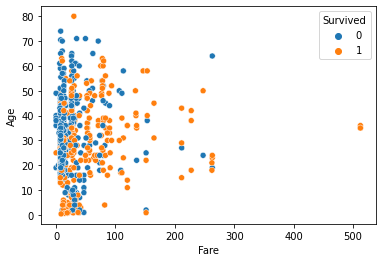

In [14]:
sns.scatterplot(data=train, x='Fare',y='Age',hue='Survived')

* As fare inreases, chances of survival increase

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

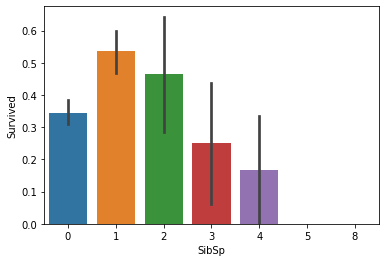

In [15]:
#Does SibSp and Parch have an effect on survival?
sns.barplot(data=train, x='SibSp',y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

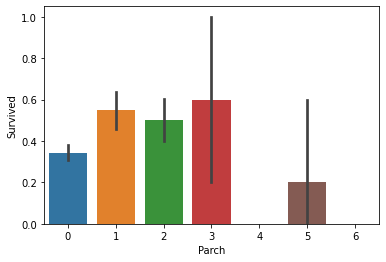

In [16]:
sns.barplot(data=train, x='Parch',y='Survived')

* From the above two graphs it is clear that having family increases chances of survival in some cases.

# **3. Getting Numbers and Asking Questions**

In [17]:
#How many survived per class?
classsurvived = train.groupby(['Survived','Pclass']).Pclass.count()
print(classsurvived)

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


In [18]:
#How many of top 100 fare purchasers survived?
topHundred = train.nlargest(100,'Fare')
numberSurvivedTopHundred = topHundred.groupby('Survived').PassengerId.count()
print(numberSurvivedTopHundred)

Survived
0    26
1    74
Name: PassengerId, dtype: int64


In [19]:
#how many survived per age group?
ages = train.groupby(pd.cut(train["Age"], np.arange(0, 100, 9))).Survived.count()
print(ages)

Age
(0, 9]       62
(9, 18]      77
(18, 27]    198
(27, 36]    182
(36, 45]     92
(45, 54]     61
(54, 63]     29
(63, 72]     11
(72, 81]      2
(81, 90]      0
(90, 99]      0
Name: Survived, dtype: int64


In [20]:
#rate of gender survival
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women) #as 1 == survived we can sum

men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [21]:
#How many survived depending on the number of parents/children they had aboard?
parch = train.groupby(['Parch','Survived']).PassengerId.count()
print(parch)


Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64


In [22]:
##How many survived depending on the number of siblings/spouses they had aboard?
sibsp = train.groupby(['SibSp','Survived']).PassengerId.count()
print(sibsp)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64


# **4.Feature engineering and Data Pre-Processing**
* I am going to create a travelling alone variable, to combine SibSp and Parch
* I am also going to create a first class variable, making it a 1 if you are in first class and a 0 if not. As it is clear first class has a higher chance of survival.

**Alternatives for feature egineering:**
* You could create a family size variable
* You could create a variable based on first and second class rather than just first.

In [23]:
train_model = train #keeping copies of orignal
test_model = test

In [24]:
#creating travelling alone variable
train_model['TravelAlone']=np.where((train_model["SibSp"]+train_model["Parch"])>0, 0, 1)
test_model['TravelAlone']=np.where((test_model["SibSp"]+test_model["Parch"])>0, 0, 1)

#creating family size variable
#train_model['FamilySize']= train_model['SibSp'] + train_model['Parch']
#test_model['FamilySize']= test_model['SibSp'] + test_model['Parch']

#creating first class variable
train_model['FirstClass']=np.where((train_model["Pclass"])==1, 1, 0)
test_model['FirstClass']=np.where((test_model["Pclass"])==1, 1, 0)

#creating first and second class variable
#train_model['FirstSecondClass']=np.where((train_model["Pclass"])<3, 1, 0)
#test_model['FirstSecondClass']=np.where((test_model["Pclass"])<3, 1, 0)

**Dropping unwanted vairables**

In [25]:
train_model = train_model.drop(['Name'], axis=1)
test_model = test_model.drop(['Name'], axis=1)

train_model = train_model.drop(['SibSp'], axis=1)
test_model = test_model.drop(['SibSp'], axis=1)

train_model = train_model.drop(['Parch'], axis=1)
test_model = test_model.drop(['Parch'], axis=1)

train_model = train_model.drop(['Ticket'], axis=1)
test_model = test_model.drop(['Ticket'], axis=1)

train_model = train_model.drop(['Cabin'], axis=1)
test_model = test_model.drop(['Cabin'], axis=1)

train_model = train_model.drop(['Embarked'], axis=1)
test_model = test_model.drop(['Embarked'], axis=1)

#keep ahold of ID's for final submission
passengerId = test_model['PassengerId']
train_model = train_model.drop(['PassengerId'], axis=1)
test_model = test_model.drop(['PassengerId'], axis=1)

**Here we create all data, a combination of the training and test data in order to do a couple of things:**
* Get dummies on all the data so that the training and test data is consistent. We use get dummies to translate categorical variables into numerical ones.
* Take the logarithm of fare to make it more normally distributed in our model.

      Age      Fare  TravelAlone  FirstClass  Sex_female  Sex_male
0    22.0  2.110213            0           0           0         1
1    38.0  4.280593            0           1           1         0
2    26.0  2.188856            1           0           1         0
3    35.0  3.990834            0           1           1         0
4    35.0  2.202765            1           0           0         1
..    ...       ...          ...         ...         ...       ...
413  30.0  2.202765            1           0           0         1
414  39.0  4.699571            1           1           1         0
415  38.5  2.110213            1           0           0         1
416  30.0  2.202765            1           0           0         1
417  30.0  3.150952            0           0           0         1

[1309 rows x 6 columns]


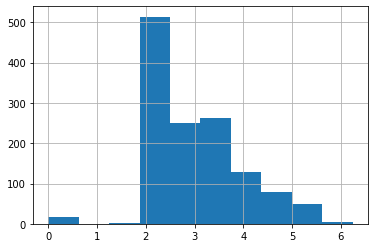

In [26]:
#concatenate the data as processing it together is easier 

all_data = pd.concat((train_model.loc[:,'Sex':'FirstClass'], #
                      test_model.loc[:,'Sex':'FirstClass'])) #

all_data = pd.get_dummies(all_data)


all_data = all_data.fillna(all_data.mean().round(0)) #only age has null values - so we will fill it with its mean as it is normally distributed

#taking the log of fare to make it more normally distributed
all_data['Fare'] = np.log(all_data.Fare+1)
all_data['Fare'].hist()

print(all_data)

**Splitting into test and train**

In [27]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

y = train.Survived
print(X_train)

      Age      Fare  TravelAlone  FirstClass  Sex_female  Sex_male
0    22.0  2.110213            0           0           0         1
1    38.0  4.280593            0           1           1         0
2    26.0  2.188856            1           0           1         0
3    35.0  3.990834            0           1           1         0
4    35.0  2.202765            1           0           0         1
..    ...       ...          ...         ...         ...       ...
886  27.0  2.639057            1           0           0         1
887  19.0  3.433987            1           1           1         0
888  30.0  3.196630            0           0           1         0
889  26.0  3.433987            1           1           0         1
890  32.0  2.169054            1           0           0         1

[891 rows x 6 columns]


# **5. Creating our Logistic Regression Model**

In [28]:
#Using logistic Regression Model
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y)
LR_pred = lgr.predict(X_test)

submission = test_model

submission['PassengerId'] = passengerId
submission['Survived'] = LR_pred

submission = submission.drop(['Pclass'], axis=1)
submission = submission.drop(['Sex'], axis=1)
submission = submission.drop(['Age'], axis=1)
submission = submission.drop(['Fare'], axis=1)

submission = submission[['PassengerId','Survived']]

print(submission)
submission.to_csv('submission.csv', index = False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
